In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
import logging

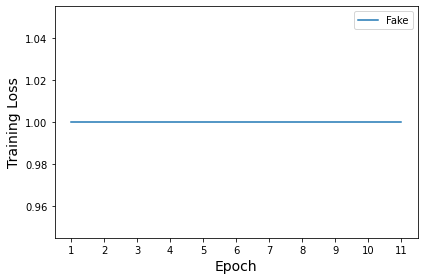

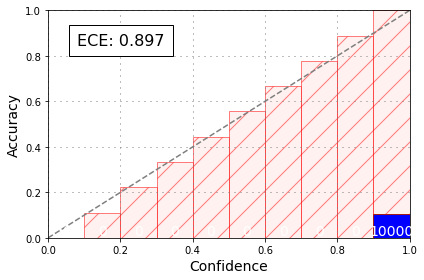

In [18]:
from training.calibration import reliability_diagram
from experiments.base.multiclass_classification import eval_model
from experiments.base import mnist

testloader = mnist.testloader("./data/", 20)

class FakeModel:
    def infer(self, input, samples):
        output = torch.full((samples,input.shape[0],10), np.log(1e-6)).to(input.device)
        output[...,2] = np.log(1)
        return output

    def all_losses(self):
        return [[1 for _ in range(11)]]

eval_model("Fake", FakeModel(), 100, testloader, torch.device("cuda"), None, logging.getLogger("out"))